In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

datafile = 'melb_data.csv'
df = pd.read_csv(datafile)

In [ ]:
df.shape

df = df.dropna()
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0
6,Abbotsford,124 Yarra St,3,h,1876000.0,S,Nelson,7/05/2016,2.5,3067.0,...,2.0,0.0,245.0,210.0,1910.0,Yarra,-37.8024,144.9993,Northern Metropolitan,4019.0
7,Abbotsford,98 Charles St,2,h,1636000.0,S,Nelson,8/10/2016,2.5,3067.0,...,1.0,2.0,256.0,107.0,1890.0,Yarra,-37.8060,144.9954,Northern Metropolitan,4019.0


In [ ]:
df.shape
df.nunique()

Suburb            287
Address          6117
Rooms               8
Type                3
Price            1570
Method              5
SellerG           203
Date               51
Distance          192
Postcode          185
Bedroom2           10
Bathroom            8
Car                11
Landsize         1128
BuildingArea      549
YearBuilt         135
CouncilArea        31
Lattitude        3463
Longtitude       3762
Regionname          8
Propertycount     284
dtype: int64

In [ ]:
categorical_columns = df.select_dtypes(include=['object'])  # 'object' type columns represent categorical data
numerical_columns = df.select_dtypes(exclude=['object'])   # Excluding 'object' type columns gives numerical columns

le = OneHotEncoder()
for column in categorical_columns:
    df[column] = le.fit_transform(df[column])

    

ValueError: Expected 2D array, got 1D array instead:
array=['Abbotsford' 'Abbotsford' 'Abbotsford' ... 'Williamstown' 'Windsor'
 'Yarraville'].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
from scipy import stats
def remove_outliers(df, column_name):
    z_scores = stats.zscore(df[column_name])
    df['Z_score'] = abs(z_scores)
    df_filtered = df[df['Z_score'] < 2]
    df_filtered = df_filtered.drop(columns=['Z_score'])
    return df_filtered
# for columns in df.columns:
    df = remove_outliers(df, 'Landsize')
# df = df_cleaned


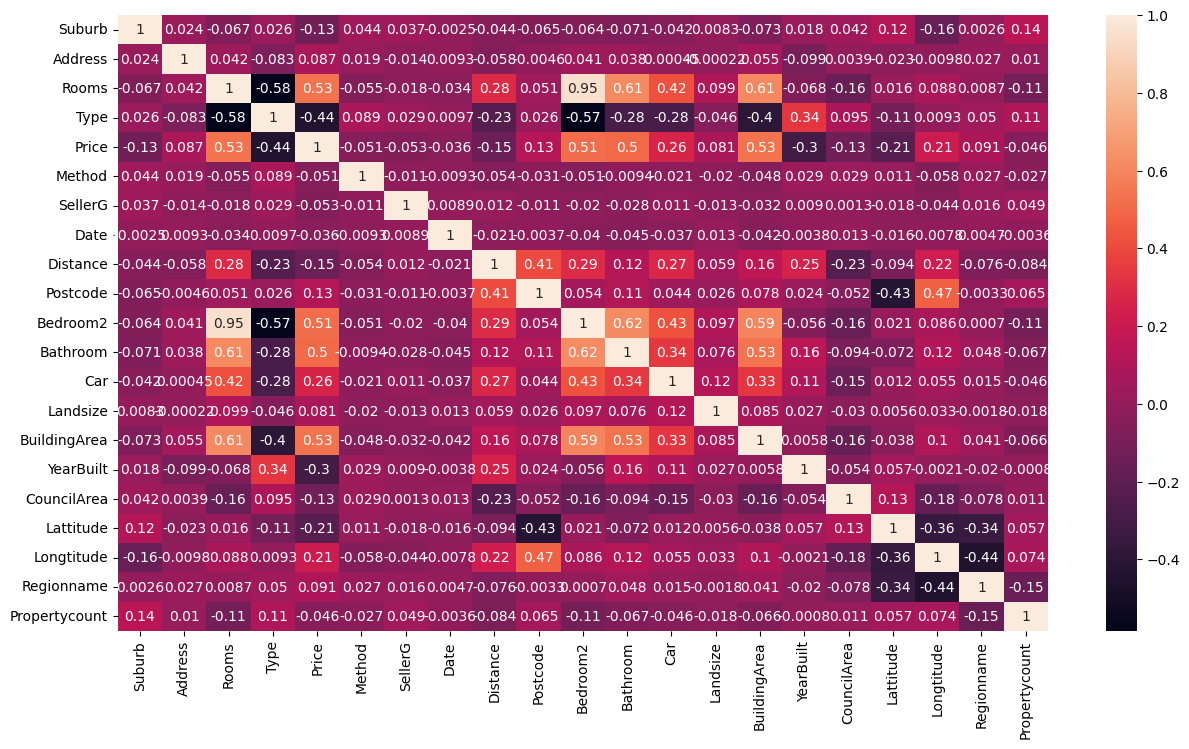

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot=True);

In [ ]:
sdf = df[['Price',"Rooms", "Type", "Bedroom2", "Bathroom", "YearBuilt", "Lattitude", "Longtitude","BuildingArea","Postcode","Distance"]]
sdf.head()

,Price,Rooms,Type,Bedroom2,Bathroom,YearBuilt,Lattitude,Longtitude,BuildingArea,Postcode,Distance
1,1035000.0,2,0,2.0,1.0,1900.0,-37.8079,144.9934,79.0,3067.0,2.5
2,1465000.0,3,0,3.0,2.0,1900.0,-37.8093,144.9944,150.0,3067.0,2.5
4,1600000.0,4,0,3.0,1.0,2014.0,-37.8072,144.9941,142.0,3067.0,2.5
6,1876000.0,3,0,4.0,2.0,1910.0,-37.8024,144.9993,210.0,3067.0,2.5
7,1636000.0,2,0,2.0,1.0,1890.0,-37.8060,144.9954,107.0,3067.0,2.5


In [ ]:
X = sdf[["Rooms", "Type", "Bedroom2", "Bathroom", "YearBuilt", "Lattitude", "Longtitude","BuildingArea","Postcode","Distance"]]
y = sdf[['Price']]
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

scaler_y = MinMaxScaler()
y = scaler_y.fit_transform(y.values.reshape(-1,1))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=777)

sdf[["Rooms", "Type", "Bedroom2", "Bathroom", "YearBuilt", "Lattitude", "Longtitude","BuildingArea","Postcode","Distance"]]=X
sdf[['Price']]=y

In [ ]:
sdf = sdf.dropna()
print(sdf.head())
sdf.shape

      Price     Rooms  Type  Bedroom2  Bathroom  YearBuilt  Lattitude  \
1  0.101928  0.142857   0.0  0.222222  0.000000   0.856448   0.504387   
2  0.150412  0.285714   0.0  0.333333  0.142857   0.856448   0.502409   
4  0.165633  0.428571   0.0  0.333333  0.000000   0.995134   0.505376   
6  0.196753  0.285714   0.0  0.444444  0.142857   0.868613   0.512157   
7  0.169692  0.142857   0.0  0.222222  0.000000   0.844282   0.507071   

   Longtitude  BuildingArea  Postcode  Distance  
1    0.458373      0.025386  0.068577  0.052743  
2    0.459389      0.048201  0.068577  0.052743  
4    0.459085      0.045630  0.068577  0.052743  
6    0.464369      0.067481  0.068577  0.052743  
7    0.460406      0.034383  0.068577  0.052743  


(6196, 11)

In [ ]:
lr = LinearRegression(fit_intercept=True)
forest = RandomForestRegressor(n_estimators=150,max_depth=14)

lr.fit(X_train,y_train)
forest.fit(X_train,y_train)


y_pred_lr = lr.predict(X_test)
y_pred_forest = forest.predict(X_test)

mse_forest = mean_squared_error(y_test, y_pred_forest)
mse_lr = mean_squared_error(y_test,y_pred_lr)
r2_forest = r2_score( y_test,y_pred_forest)
r2_lr = r2_score(y_test, y_pred_lr)

print("Random Forest Result :")
print(f"Mean Squared Error : {mse_forest}")
print(f"R2 Score : {r2_forest}")
print("Linear Regression Result :")
print(f"Mean Squared Error : {mse_lr}")
print(f"R2 Score : {r2_lr}")


Random Forest Result :
Mean Squared Error : 0.0018884982635071362
R2 Score : 0.7338621715397753
Linear Regression Result :
Mean Squared Error : 0.003009689042061133
R2 Score : 0.5758576423008412


NameError: name 'forest' is not defined